In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
from sklearn.decomposition import PCA

In [5]:
df = pd.read_excel("/Users/alsabbaghs/Downloads/DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [6]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [7]:
X1 = df.drop("Class", axis = 1)
Y = df["Class"]

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

Y1 = Y.replace({"DERMASON": 1, "SIRA": 1, "SEKER": 4, "HOROZ": 2, "CALI": 3, "BARBUNYA": 3, "BOMBAY": 0})

In [13]:
kmeans1 = KMeans(n_clusters = 5, random_state = 0)
kmeans1.fit(X1)
labels1 = kmeans1.labels_

cm = confusion_matrix(Y1, labels1)
print (cm)

[[ 521    0    0    1    0]
 [   0 5626  172   88  296]
 [   0   32 1842   54    0]
 [   0   56   59 2814   23]
 [   0  142    0    5 1880]]


In [10]:
accuracy(cm)

0.9318198515906252

In [21]:
X = pd.concat([df[df['Class']=="HOROZ"], df[df['Class']=="SIRA"], df[df['Class']=="CALI"],df[df['Class']=="DERMASON"]])
y = X['Class']
y = y.replace({"DERMASON": 1, "SIRA": 1, "BARBUNYA": 2, "CALI": 2})
X = X.drop('Class', axis=1)

In [23]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
# Reshape the data for the 1D CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())   
model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)
tensorboard_callback = TensorBoard(log_dir="./logs")

# Fit the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, early_stopping])

NameError: name 'tf' is not defined

In [22]:
# predict class probabilities for test set
y_pred = model.predict(X_test)

# convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# compute confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(conf_matrix) 

NameError: name 'model' is not defined

In [ ]:
accuracy(conf_matrix)

In [20]:
# Fit K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(1, 3)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Assign labels to the clusters based on the centroids
labels = []
for i in range(len(centroids)):
    # Calculate the distance between each centroid and all data points in that cluster
    distances = cdist(X[kmeans.labels_ == i], [centroids[i]], 'euclidean')
    # Find the index of the data point that is closest to the centroid
    index = np.argmin(distances)
    # Use the index to get the actual data point and extract any relevant features
    datapoint = X[kmeans.labels_ == i][index]
    # Use the relevant features to assign a label to the cluster
    if datapoint[0] > 0.5:
        label = "Cluster 1"
    else:
        label = "Cluster 2"
    labels.append(label)

# Print the labels assigned to each cluster
print("Cluster labels:", labels)


ValueError: Expected 2D array, got scalar array instead:
array=1.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
accuracy(cm)

In [27]:
X1 = df.drop("Class", axis = 1)
Y = df["Class"]

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

Y1 = Y.replace({"DERMASON": 0, "SIRA": 1, "SEKER": 4, "HOROZ": 2, "CALI": 3, "BARBUNYA": 5, "BOMBAY": 6})

In [28]:
kmeans1 = KMeans(n_clusters = 5, random_state = 0)
kmeans1.fit(X1)
labels1 = kmeans1.labels_

cm = confusion_matrix(Y1, labels1)
print (cm)

[[   0 3257   16    2  271    0    0]
 [   0 2369  156   86   25    0    0]
 [   0   32 1842   54    0    0    0]
 [   0    4   44 1580    2    0    0]
 [   0  142    0    5 1880    0    0]
 [   0   52   15 1234   21    0    0]
 [ 521    0    0    1    0    0    0]]


In [29]:
accuracy(cm)

0.5635882741899934

In [6]:
n_df2 = df[labels1 == 1]
X2 = n_df2.drop("Class", axis = 1)
X2 = scaler.fit_transform(X2)

Y2 = Y.replace({"DERMASON": 1, "SIRA": 5, "SEKER": 4, "HOROZ": 2, "CALI": 3, "BARBUNYA": 3, "BOMBAY": 0})

kmeans2 = KMeans(n_clusters = 2, random_state = 0)
kmeans2.fit(X2)
labels2 = kmeans2.labels_

#labels2[labels2 == 0] = 5

labels2[labels2 == 1] = 5
labels2[labels2 == 0] = 1

idx2 = np.where(np.logical_and(labels1 == 1, labels1 == 1))[0]
labels1[idx2] = labels2

cm = confusion_matrix(Y2, labels1)
accuracy(cm)

0.8804643303210639

In [7]:
n_df3 = df[labels1 == 3]
X3 = n_df3.drop("Class", axis = 1)
X3 = scaler.fit_transform(X3)

Y3 = Y.replace({"DERMASON": 1, "SIRA": 5, "SEKER": 4, "HOROZ": 2, "CALI": 3, "BARBUNYA": 6, "BOMBAY": 0})

kmeans3 = KMeans(n_clusters = 2, random_state = 0)
kmeans3.fit(X3)
labels3 = kmeans3.labels_

labels3[labels3 == 1] = 3
labels3[labels3 == 0] = 6

idx3 = np.where(np.logical_and(labels1 == 3, labels1 == 3))[0]
labels1[idx3] = labels3

cm = confusion_matrix(Y3, labels1)
print("Accuracy:", accuracy(cm))

Accuracy: 0.8338843582396591


In [8]:
cm

array([[ 521,    0,    0,    1,    0,    0,    0],
       [   0, 2728,   16,    0,  271,  529,    2],
       [   0,    3, 1842,   28,    0,   29,   26],
       [   0,    0,   44, 1318,    2,    4,  262],
       [   0,   39,    0,    0, 1880,  103,    5],
       [   0,  170,  156,    0,   25, 2199,   86],
       [   0,    0,   15,  372,   21,   52,  862]])

[[-4.98156099  1.82469731]
 [-5.43679225  2.9323648 ]
 [-4.7580883   1.82688385]
 ...
 [-1.41751472  0.1411937 ]
 [-1.11466584 -0.21267932]
 [-0.76643686 -0.64651411]]


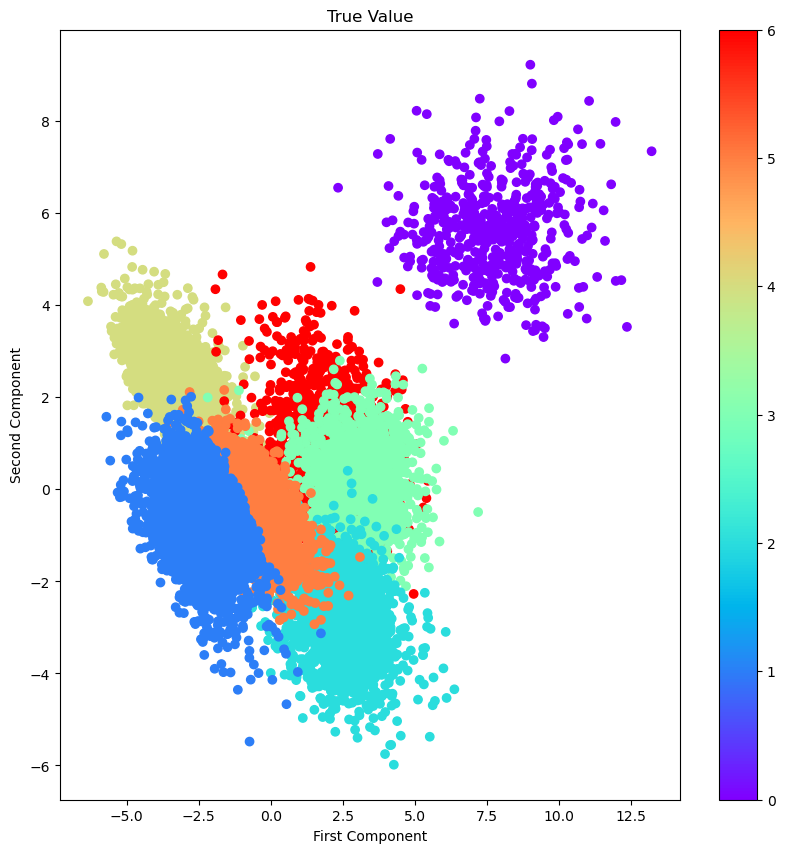

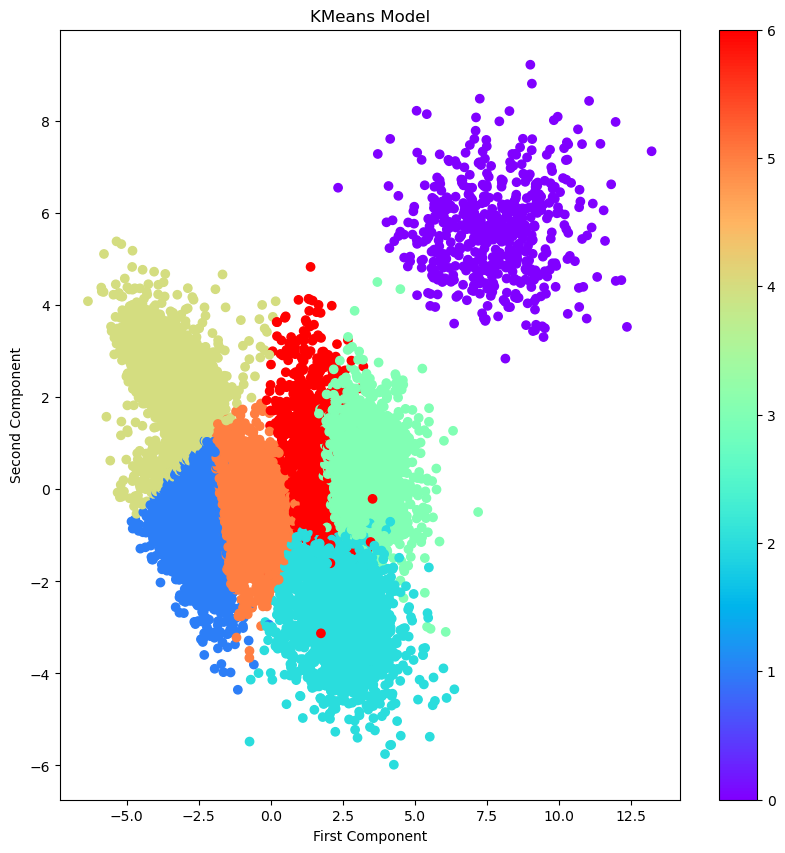

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)
print(principalComponents)


fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = Y3, cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('True Value')
plt.colorbar(scatter)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = labels1, cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('KMeans Model')
plt.colorbar(scatter)
plt.show()

In [10]:
df["Class"] = df["Class"].replace({"DERMASON": 1, "SIRA": 2, "SEKER": 6, "HOROZ": 4, "CALI": 5, "BARBUNYA": 0, "BOMBAY": 3})

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Class", axis = 1), df["Class"], test_size = 0.2857, random_state = 42, shuffle = True)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(Y_train)

(9722, 16) (9722,) (3889, 16) (3889,)


In [12]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range



In [13]:
grid = [[6, 6], [6, 8], [4, 6], [5, 7], [10, 10], [5, 5], [15, 15]]
max_m_dsitance = 7
max_learning_rate = 0.5
max_steps = 50002
loop = [500, 1000, 5000, 10000, 20000, 50000]

#num_nurons = 7 * np.sqrt(X_train.shape[0])
#grid_size = ceil(np.sqrt(num_nurons))
#print(grid_size)

In [14]:
# #mian function

# train_x_norm = minmax_scaler(X_train) # normalisation
# data = minmax_scaler(X_test) # normalisation
# # initialising self-organising map
# num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
# np.random.seed(40)


# # start training iterations

# for j in range(len(grid)):
#   num_rows = grid[j][0]
#   num_cols = grid[j][1]
#   som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction
#   print("Grid " f"{num_rows} x {num_cols}:")
#   for step in range(max_steps):
#     #if (step+1) % 1000 == 0:
#       #print("Iteration: ", step+1) # print out the current iteration for every 1k
#     learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

#     t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
#     winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
#     for row in range(num_rows):
#       for col in range(num_cols):
#         if m_distance([row,col],winner) <= neighbourhood_range:
#           som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
#     for i in loop:
#       if step == i:
#         label_data = np.array(Y_train)
#         map = np.empty(shape=(num_rows, num_cols), dtype=object)

#         for row in range(num_rows):
#           for col in range(num_cols):
#             map[row][col] = [] # empty list to store the label

#         for t in range(train_x_norm.shape[0]):
#           #if (t+1) % 1000 == 0:
#             #print("sample data: ", t+1)
#           winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
#           map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
#         label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
#         for row in range(num_rows):
#           for col in range(num_cols):
#             label_list = map[row][col]
#             if len(label_list)==0:
#               label = 2
#             else:
#               label = max(label_list, key=label_list.count)
#             label_map[row][col] = label
        
#         winner_labels = []

#         for t in range(data.shape[0]):
#           winner = winning_neuron(data, t, som, num_rows, num_cols)
#           row = winner[0]
#           col = winner[1]
#           predicted = label_map[row][col]
#           winner_labels.append(predicted)

#         print("Loop " f"{i}: "  "Accuracy: ",accuracy_score(Y_test, np.array(winner_labels)))

# #print("SOM training completed")

In [15]:
num_rows = 15
num_cols = 15
max_m_dsitance = 7
max_learning_rate = 0.5
max_steps = 50000

#num_nurons = 7 * np.sqrt(X_train.shape[0])
#grid_size = ceil(np.sqrt(num_nurons))
#print(grid_size)

In [16]:
#mian function

train_x_norm = minmax_scaler(X_train) # normalisation
data = minmax_scaler(X_test) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
SOM training completed


In [18]:
label_data = np.array(Y_train)
map = np.empty(shape=(num_rows, num_cols), dtype=object)


for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  #print(winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron


sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000


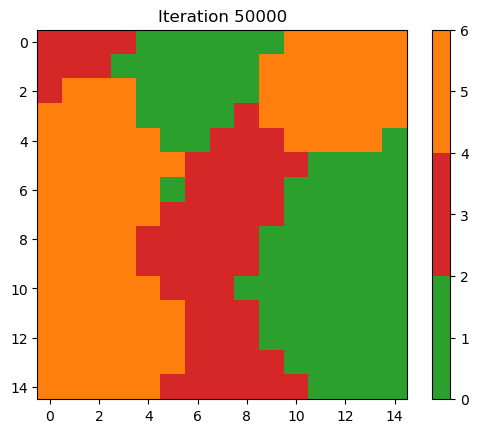

In [19]:
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [20]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(X_test) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(Y_test, np.array(winner_labels)))

Accuracy:  0.892517356646953
